In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (15,10)


## A little statistics

### 1. Converting a probability into a $\sigma$.
First, we look at normal distributions. These are distributions that are described by the probability density function: $$P(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-\mu)^2/(2 \sigma ^2)}$$ where $\mu$ represents the mean and $\sigma^2$ represents the variance. In a 'standard normal distribution' $\mu = 0$ and $\sigma^2 = 1$. To find the probability from a probability density function, integrate the probability density function. The limits of integration will depend on the statistical question you are asking. For example, if the signal you are looking for is anything $X = 1$ or less, the limits of integration would be from $-\infty$ to 1. $$Probability = \int^{1}_{-\infty}\frac{1}{\sigma \sqrt{2 \pi}} e^{-(X-\mu)^2(2 \sigma ^2)} \, dx\\ 
= \frac{1}{2} \text{erf} \biggl(\frac{X}{2}\biggr)$$
The antiderivative of a normal distribution is so commonly used that there is a special function called the error function. 
Luckily, it is very common to need to do this calculation so there is a special function `scipy.norm.cdf()` that takes a z-value ('sigma') and finds the probability of getting that value or less.
Here we find the probability of getting 0.1 or less and 0.01 or less in a standard normal distribution.

In [59]:
print(stats.norm.cdf(0.1))
print(stats.norm.cdf(0.01))

0.539827837277029
0.5039893563146316


However, if you are looking for a signal at $X = 1$ or greater, the limits of integration would be from 1 to $\infty$. And your integral would look like this: $$Probability = \int_{1}^{\infty}\frac{1}{\sigma \sqrt{2 \pi}} e^{-(X-\mu)^2(2 \sigma ^2)} \, dx\\ 
= \frac{1}{2} \text{erfc} \biggl(\frac{X}{2}\biggr)$$ 
Notice that the antiderivative changed. It is now the complementary error function which is defined as $$\text{erfc}(z) = 1 - \text{erf}(z)$$
To do this you can use `scipy.norm.sf()`. Here we find the probability of 0.1 or more and 0.01 or more in a standard normal distribution. Note that adding together `scipy.norm.cdf(x)` and `scipy.norm.sf(x)` gives you 1. 

In [3]:
print(stats.norm.sf(0.1))
print(stats.norm.sf(0.01))

print(stats.norm.cdf(0.1) + stats.norm.sf(0.1))

0.460172162722971
0.4960106436853684
1.0


To go from a probability to the z-value ('sigma'), you can use `scipy.norm.ppf()` where the argument is your probability. Here you can see that putting in the values we got from `scipy.norm.cdf()` into `scipy.norm.ppf()` gives us the original value we put into `scipy.norm.cdf()`.

In [60]:
print(round(stats.norm.ppf(0.539827837277029),1))
print(round(stats.norm.ppf(0.5039893563146316),2))

0.1
0.01


### 2. Other Continuous Analytic Distributions: $\chi^2$ Distribution

The probability density function of a $\chi^2$ distribution is described by:
$$P_r(x) = \frac{x^{r/2-1}e^{-x/2}}{\Gamma \bigl(\frac{1}{2} r \bigr) 2^{r/2}}$$ where r is the degrees of freedom and $\Gamma(x)$ is the gamma function. Here we set the degrees of freedom to `df = 20`, generate 100,000 random variates, and plot the binned values along with the probability density function. 

In [7]:
df = 20
d = stats.chi2.rvs(df, loc = 3.0, scale = .01, size = 100000)

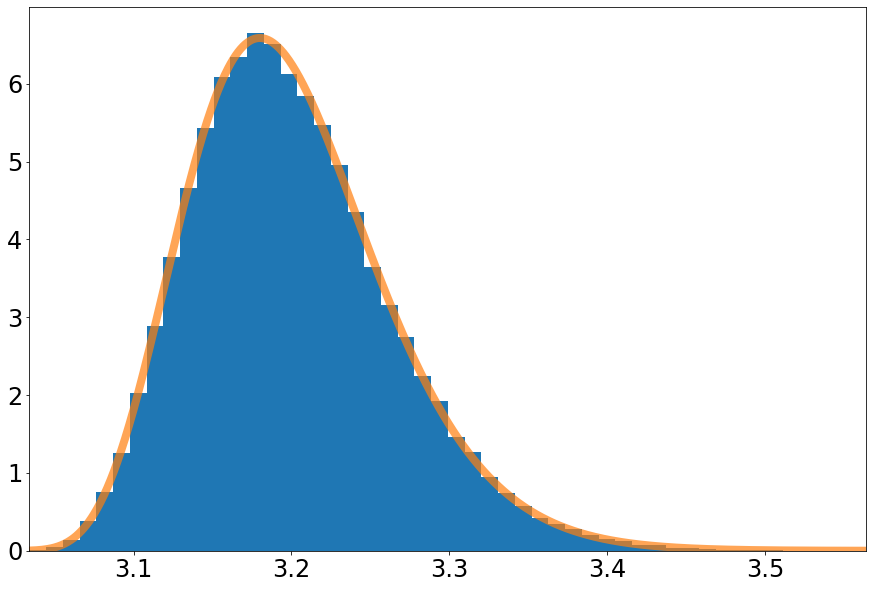

In [8]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim(min(d),max(d))
x = np.linspace(min(d), max(d),1000)
ax.plot(x, stats.chi2.pdf(x, df, loc = 3., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

3.

Now lets select some values that represent the measurement we need to find the 'sigma' of. 

In [17]:
val = [3.1, 3.3, 3.35, 3.4]

Statistical Question: What is the probability that the signal-free data produces a signal that is equally or more signal-like at greater than the chosen value?

$$Probability = \int^{\infty}_{val} (\text{pdf of} \chi^2) \, dx$$

In [18]:
probability = stats.chi2.sf(val, df, loc = 3., scale = 0.01)
print(probability)

[0.96817194 0.06985366 0.02010428 0.00499541]


In [19]:
sigma = stats.norm.ppf(probability)
print(sigma)

[ 1.85458078 -1.47688181 -2.05160001 -2.57614671]


As the probabilities get smaller, the sigmas get more negative. When the measurement value is less than the mean, the 'sigma' is positive. When the measurement value is more than the mean, the 'sigma' is negative. This happens because in a standard normal distribution, the distribution is symmetrical around X = 0 so integrating from $-\infty$ to 0 is equal and opposite from integrating from 0 to $\infty$. 


## Non-continuous Distributions: Poisson Distribution

A Poisson distribution describes the probability of getting $n$ events/occurances in $N$ trials. The probability mass function is: 
$$P_\nu(n)=e^{-\nu} \frac{\nu^n}{n!}$$ where $\nu \equiv N p$ and $p$ is the probability of an event/occurance. 

In [20]:
nu = 6

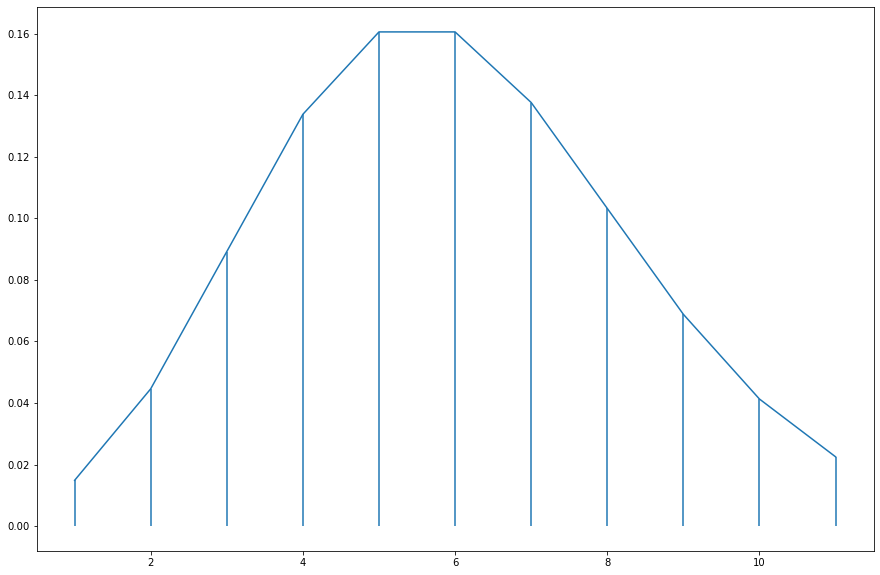

In [21]:
d = stats.poisson.rvs(nu, size = 100000);

fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01,nu), stats.poisson.ppf(0.99, nu))

plt.plot(x,stats.poisson.pmf(x,nu))
plt.vlines(x, 0, stats.poisson.pmf(x, nu))

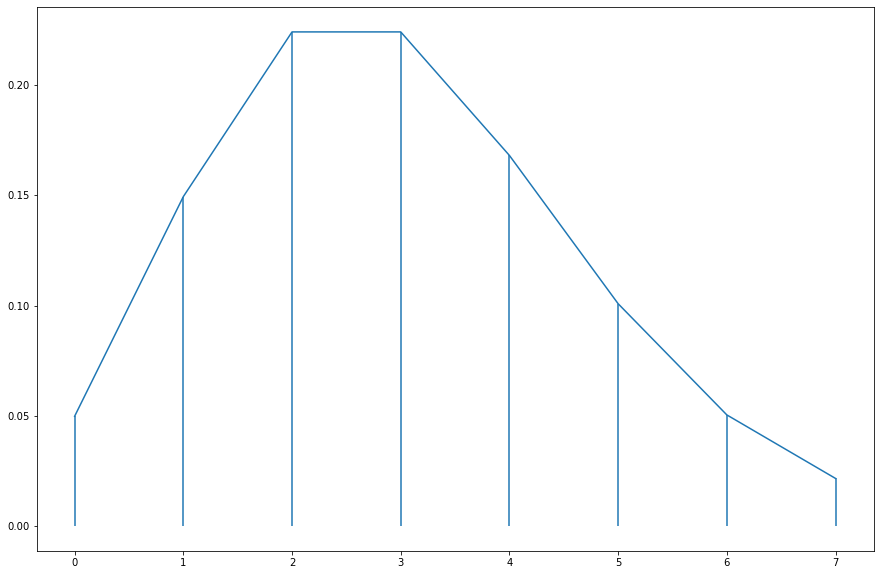

In [22]:
nu = 3
d = stats.poisson.rvs(nu, size = 100000);

fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01,nu), stats.poisson.ppf(0.99, nu))

plt.plot(x,stats.poisson.pmf(x,nu))
plt.vlines(x, 0, stats.poisson.pmf(x, nu))

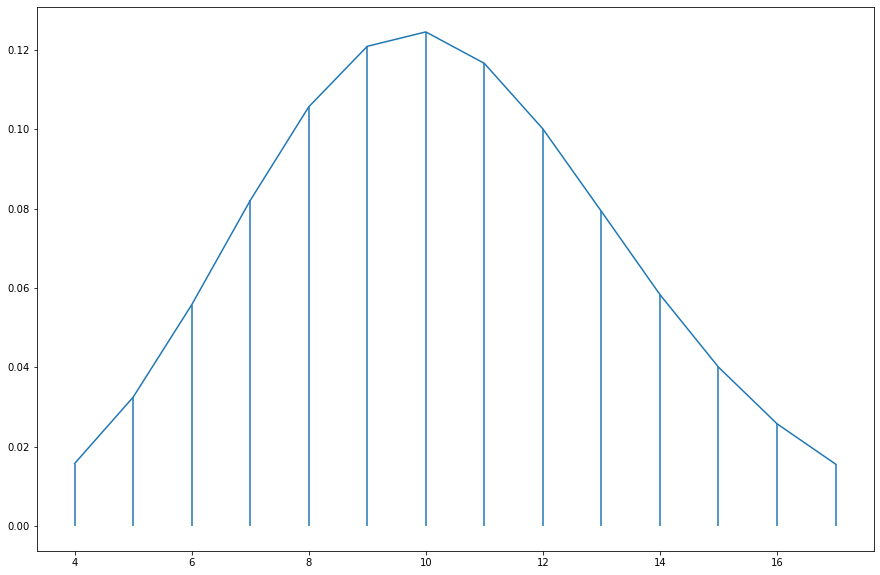

In [23]:
nu = 10.3
d = stats.poisson.rvs(nu, size = 100000);

fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01,nu), stats.poisson.ppf(0.99, nu))

plt.plot(x,stats.poisson.pmf(x,nu))
plt.vlines(x, 0, stats.poisson.pmf(x, nu))

Poisson distributions are based on $\nu$ which acts like the average value of the distribution. It is the mean rate of the occurance of the specific event. So the distribution is centered on the integer value of $\nu$. It also represents the expected value and variance. 

Statistical Question: What is the probability that the signal-free data gives a signal of 4 or less?

In [27]:
probability = stats.poisson.cdf(4, nu)
print(probability)
sigma = stats.norm.ppf(probability)
print(sigma)

0.024062063768182273
-1.9762706884607972


Since the values are discrete, probabilities and sigmas are also discrete. This implies that there are a fixed number of possible sigmas for an experiment and only certain sigmas are possible. However, the mean value can be non-integer because it is just average number of events in a given amount of time. So the number of events is discrete but the average is continuous depending on the interval of time since time is continuous.